In [1]:
import pandas as pd # pandas para poder trabajar con nuestros datos
import matplotlib.pyplot as plt # matplot para poder hacer gráficas con los resultados de nuestro modelo
import seaborn as sn # seaborn para mostrar los resultados de nuestro modelo
import scikitplot as skplt
from sklearn import metrics
from imblearn.over_sampling import SMOTE # método para realizar un sobremuestro de nuestros datos
from sklearn.ensemble import RandomForestClassifier # algoritmo de random forest
from sklearn.model_selection import train_test_split # modelo para dividir los datos de  evaluación y entrenamiento
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, roc_curve
from sklearn.metrics import confusion_matrix # método para poder extrar la matriz de confusión y mostrar los resultados de la predicción de nuestro modelo
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [2]:
train = pd.read_csv('data/jm_train.csv', sep=',')
test = pd.read_csv('data/jm_X_test.csv', sep=',')

In [58]:
data = train.drop(['target'], axis = 1)
target = train.target
smote = SMOTE()
X, Y = smote.fit_resample(data, target)


Accuracy:  0.7546816479400749
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        94
           1       0.69      0.72      0.71       105
           2       0.72      0.67      0.69       121
           3       0.75      0.74      0.75       105
           4       0.84      0.79      0.82       109

    accuracy                           0.75       534
   macro avg       0.76      0.76      0.76       534
weighted avg       0.76      0.75      0.75       534

Puntuación f1_score de los datos tratados con smote: 0.7546816479400749


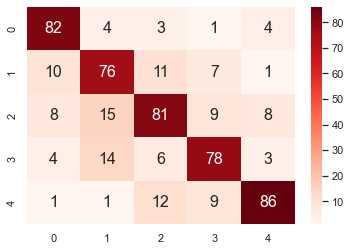

[[7.59786508e-01 6.25365079e-02 4.02592593e-03 9.84444444e-03
  1.63806614e-01]
 [6.46876984e-01 2.12588095e-01 2.29801587e-02 1.01332540e-01
  1.62222222e-02]
 [1.11111111e-03 2.15514286e-01 2.81904762e-02 7.37593651e-01
  1.75904762e-02]
 ...
 [1.09523810e-03 2.50439683e-01 5.74411111e-01 1.28119048e-01
  4.59349206e-02]
 [6.66666667e-04 0.00000000e+00 1.33333333e-03 9.98000000e-01
  0.00000000e+00]
 [1.33333333e-03 1.01960317e-02 2.05333333e-02 4.98706085e-01
  4.69231217e-01]]


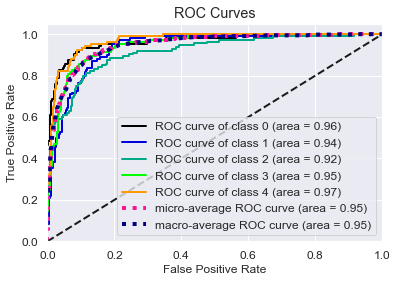

In [60]:
# variable donde guardamos nuestro modelo
modelRF = RandomForestClassifier(n_estimators = 1500, n_jobs = -1, criterion = 'entropy', min_samples_split = 4, warm_start = True) #0.8009367681498829
#modelRF = RandomForestClassifier(n_estimators = 100, n_jobs = -1, criterion = 'entropy', min_samples_split = 4) # 0.7892271662763466
#modelRF = RandomForestClassifier(n_estimators = 50, n_jobs = -1, criterion = 'gini', min_samples_split = 2)
'''
Creación de variables a partir de los que hemos tratado con smote con las que
entrenaremos nuestro modelo
'''
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

# Entrenamiento del modelo
modelRF.fit(X_train, Y_train)

# Predicciones realizadas por nuestro modelo

vulcan_model = modelRF.predict(X_test)

print('Accuracy: ', accuracy_score(Y_test, vulcan_model))

print(metrics.classification_report(vulcan_model, Y_test))

# Resultados

array = confusion_matrix(vulcan_model, Y_test)

df = pd.DataFrame(array)

print(f"Puntuación f1_score de los datos tratados con smote:", f1_score( Y_test, vulcan_model, average='micro'))
# Representación de la matriz


sn.set(font_scale =1)
plt.show(sn.heatmap(df, annot = True, annot_kws={'size':16}, cmap = 'Reds'))
predict_prob = modelRF.predict_proba(X_test)
print(predict_prob)
skplt.metrics.plot_roc(Y_test, predict_prob)
plt.show()

In [5]:
param_grid = [{'criterion': ['gini','entropy'],
              'max_depth': [None, 50, 100, 150, 200, 500],
              'min_samples_split': [2,3,4,5],
              'warm_start' : [True, False]}]

#scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'micro')
scoring = {'accuracy': make_scorer(accuracy_score),'f1': make_scorer(f1_score, average = 'micro')} #,'precision': make_scorer(precision_score, average = 'macro'),'recall': make_scorer(recall_score, average = 'macro')} #,'f1_macro': make_scorer(f1_score, average = 'macro','f1_weighted': make_scorer(f1_score, average = 'weighted')}
                                   
#Inicializamos la búsqueda grid
grid = GridSearchCV(modelRF, param_grid, cv = 5, n_jobs = -1, scoring = scoring, refit = 'f1', return_train_score = True)

#Entrenamos con los datos de entreno...
grid.fit(X_train,Y_train)

#Pintamos los resultados:
print("Mejores parámetros: ")
print(grid.best_params_)
print()
print("Puntuaciones: ")
print(grid.cv_results_['split3_test_f1'])

Mejores parámetros: 
{'criterion': 'gini', 'max_depth': 200, 'min_samples_split': 4, 'warm_start': False}

Puntuaciones: 
[0.771875 0.796875 0.775    0.790625 0.8      0.790625 0.778125 0.79375
 0.7875   0.803125 0.8      0.784375 0.784375 0.784375 0.778125 0.778125
 0.790625 0.784375 0.78125  0.7875   0.784375 0.784375 0.784375 0.7875
 0.765625 0.79375  0.784375 0.796875 0.8      0.790625 0.79375  0.78125
 0.784375 0.7875   0.778125 0.778125 0.784375 0.8      0.7875   0.79375
 0.78125  0.7875   0.7875   0.78125  0.7875   0.790625 0.775    0.78125
 0.778125 0.765625 0.784375 0.778125 0.775    0.78125  0.775    0.771875
 0.784375 0.78125  0.775    0.778125 0.778125 0.775    0.784375 0.784375
 0.778125 0.765625 0.771875 0.8      0.778125 0.778125 0.765625 0.78125
 0.78125  0.76875  0.7875   0.78125  0.759375 0.775    0.765625 0.784375
 0.78125  0.775    0.76875  0.78125  0.771875 0.78125  0.771875 0.78125
 0.775    0.775    0.771875 0.765625 0.78125  0.790625 0.759375 0.765625]


Puntuación f1_score de los datos tratados con smote_grid: 0.749063670411985


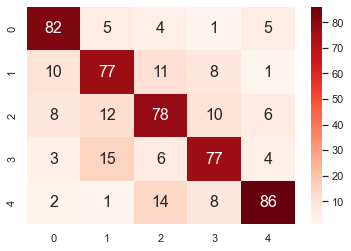

[[0.767      0.04666667 0.         0.01111111 0.17522222]
 [0.62155556 0.21611111 0.03277778 0.11344444 0.01611111]
 [0.         0.24033333 0.04722222 0.658      0.05444444]
 ...
 [0.         0.21477778 0.58793651 0.12061905 0.07666667]
 [0.         0.         0.         1.         0.        ]
 [0.         0.00888889 0.04296296 0.54302116 0.40512698]]


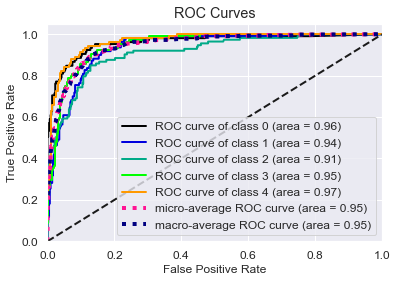

In [6]:
target_pred_grid = grid.predict(X_test)
array_grid = confusion_matrix(target_pred_grid, Y_test)

df_grid = pd.DataFrame(array_grid)


print(f"Puntuación f1_score de los datos tratados con smote_grid:", f1_score( Y_test, target_pred_grid, average='micro'))

sn.set(font_scale =1)
plt.show(sn.heatmap(df_grid, annot = True, annot_kws={'size':16}, cmap = 'Reds'))
predict_prob_grid = grid.predict_proba(X_test)
print(predict_prob_grid)
skplt.metrics.plot_roc(Y_test, predict_prob_grid)
plt.show()